In [8]:
import os
import tensorflow.compat.v1 as tf
import math
import numpy as np
import itertools
from PIL import Image 
from os import listdir

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

In [9]:
DIR_TO_STORE = '/home/rdr2143/waymo-adv-dataset/train-vehicles/'

TYPE_UNKNOWN = 0;
TYPE_VEHICLE = 1;
TYPE_PEDESTRIAN = 2;
TYPE_SIGN = 3;
TYPE_CYCLIST = 4;

In [10]:
def convert_to_dataset_loader_format(frame, camera_image, camera_labels, layout, counter=0):
    if (camera_image.name != 2):
        return False
    
    tf_image = tf.image.decode_jpeg(camera_image.image)
    h, w, _ = tf_image.shape
    for camera_labels in frame.camera_labels:
        if camera_labels.name != camera_image.name:
            continue
        labels_for_image = []
        for label in camera_labels.labels:
            if (label.type == TYPE_VEHICLE):
                width = label.box.length/w
                height = label.box.width/h
                x = label.box.center_x/w
                y = label.box.center_y/h
                labels_for_image.append([0, x, y, width, height])
    
    if (len(labels_for_image) == 0):
        return False
    
    file_name = 'training_img_'+str(counter)
    print(f'Number of labels found for image: {len(labels_for_image)}')
    labels_file_name = DIR_TO_STORE+'labels/'+file_name+'.txt'
    label_file = open(labels_file_name, 'w')
    for each in labels_for_image:
        value_to_write = " ".join([str(x) for x in each])
        label_file.write(f'{value_to_write} \n')
    label_file.close()
    
    print(f'writing image {counter}')
    image_name = DIR_TO_STORE+file_name+'.jpg'
    decodeit = open(image_name, 'wb')
    decodeit.write(camera_image.image)
    decodeit.close()
    
    return True

In [11]:
def run():
    TF_RECORDS_DIR = '/home/rdr2143/data/waymotfrecord/training/'
    counter = 0
    for FILENAME in listdir(TF_RECORDS_DIR):
        dataset = tf.data.TFRecordDataset(TF_RECORDS_DIR+FILENAME, compression_type='')
        for data in dataset:
            frame = open_dataset.Frame()
            frame.ParseFromString(bytearray(data.numpy()))
            for index, image in enumerate(frame.images):
                wrote = convert_to_dataset_loader_format(frame, image, frame.camera_labels, [3, 3, index+1], counter)
                if wrote:
                    counter += 1
                    break

In [12]:
run()

Number of labels found for image: 2
writing image 0
Number of labels found for image: 2
writing image 1
Number of labels found for image: 2
writing image 2
Number of labels found for image: 2
writing image 3
Number of labels found for image: 2
writing image 4
Number of labels found for image: 2
writing image 5
Number of labels found for image: 2
writing image 6
Number of labels found for image: 2
writing image 7
Number of labels found for image: 2
writing image 8
Number of labels found for image: 3
writing image 9
Number of labels found for image: 3
writing image 10
Number of labels found for image: 3
writing image 11
Number of labels found for image: 3
writing image 12
Number of labels found for image: 3
writing image 13
Number of labels found for image: 4
writing image 14
Number of labels found for image: 4
writing image 15
Number of labels found for image: 4
writing image 16
Number of labels found for image: 4
writing image 17
Number of labels found for image: 4
writing image 18
Num

Number of labels found for image: 4
writing image 155
Number of labels found for image: 4
writing image 156
Number of labels found for image: 5
writing image 157
Number of labels found for image: 5
writing image 158
Number of labels found for image: 6
writing image 159
Number of labels found for image: 6
writing image 160
Number of labels found for image: 6
writing image 161
Number of labels found for image: 6
writing image 162
Number of labels found for image: 5
writing image 163
Number of labels found for image: 6
writing image 164
Number of labels found for image: 6
writing image 165
Number of labels found for image: 6
writing image 166
Number of labels found for image: 6
writing image 167
Number of labels found for image: 6
writing image 168
Number of labels found for image: 6
writing image 169
Number of labels found for image: 6
writing image 170
Number of labels found for image: 6
writing image 171
Number of labels found for image: 6
writing image 172
Number of labels found for i

Number of labels found for image: 17
writing image 309
Number of labels found for image: 16
writing image 310
Number of labels found for image: 16
writing image 311
Number of labels found for image: 1
writing image 312
Number of labels found for image: 1
writing image 313
Number of labels found for image: 1
writing image 314
Number of labels found for image: 1
writing image 315
Number of labels found for image: 1
writing image 316
Number of labels found for image: 1
writing image 317
Number of labels found for image: 1
writing image 318
Number of labels found for image: 1
writing image 319
Number of labels found for image: 1
writing image 320
Number of labels found for image: 1
writing image 321
Number of labels found for image: 1
writing image 322
Number of labels found for image: 1
writing image 323
Number of labels found for image: 1
writing image 324
Number of labels found for image: 1
writing image 325
Number of labels found for image: 1
writing image 326
Number of labels found fo

Number of labels found for image: 3
writing image 466
Number of labels found for image: 3
writing image 467
Number of labels found for image: 3
writing image 468
Number of labels found for image: 3
writing image 469
Number of labels found for image: 3
writing image 470
Number of labels found for image: 3
writing image 471
Number of labels found for image: 4
writing image 472
Number of labels found for image: 4
writing image 473
Number of labels found for image: 4
writing image 474
Number of labels found for image: 3
writing image 475
Number of labels found for image: 4
writing image 476
Number of labels found for image: 4
writing image 477
Number of labels found for image: 4
writing image 478
Number of labels found for image: 4
writing image 479
Number of labels found for image: 5
writing image 480
Number of labels found for image: 4
writing image 481
Number of labels found for image: 4
writing image 482
Number of labels found for image: 4
writing image 483
Number of labels found for i

Number of labels found for image: 1
writing image 618
Number of labels found for image: 1
writing image 619
Number of labels found for image: 1
writing image 620
Number of labels found for image: 1
writing image 621
Number of labels found for image: 1
writing image 622
Number of labels found for image: 1
writing image 623
Number of labels found for image: 1
writing image 624
Number of labels found for image: 1
writing image 625
Number of labels found for image: 1
writing image 626
Number of labels found for image: 1
writing image 627
Number of labels found for image: 1
writing image 628
Number of labels found for image: 1
writing image 629
Number of labels found for image: 1
writing image 630
Number of labels found for image: 1
writing image 631
Number of labels found for image: 1
writing image 632
Number of labels found for image: 1
writing image 633
Number of labels found for image: 1
writing image 634
Number of labels found for image: 1
writing image 635
Number of labels found for i

Number of labels found for image: 9
writing image 770
Number of labels found for image: 9
writing image 771
Number of labels found for image: 9
writing image 772
Number of labels found for image: 9
writing image 773
Number of labels found for image: 9
writing image 774
Number of labels found for image: 9
writing image 775
Number of labels found for image: 9
writing image 776
Number of labels found for image: 9
writing image 777
Number of labels found for image: 9
writing image 778
Number of labels found for image: 9
writing image 779
Number of labels found for image: 9
writing image 780
Number of labels found for image: 9
writing image 781
Number of labels found for image: 9
writing image 782
Number of labels found for image: 9
writing image 783
Number of labels found for image: 9
writing image 784
Number of labels found for image: 9
writing image 785
Number of labels found for image: 9
writing image 786
Number of labels found for image: 8
writing image 787
Number of labels found for i

Number of labels found for image: 22
writing image 921
Number of labels found for image: 22
writing image 922
Number of labels found for image: 22
writing image 923
Number of labels found for image: 22
writing image 924
Number of labels found for image: 23
writing image 925
Number of labels found for image: 22
writing image 926
Number of labels found for image: 21
writing image 927
Number of labels found for image: 21
writing image 928
Number of labels found for image: 21
writing image 929
Number of labels found for image: 20
writing image 930
Number of labels found for image: 20
writing image 931
Number of labels found for image: 21
writing image 932
Number of labels found for image: 21
writing image 933
Number of labels found for image: 20
writing image 934
Number of labels found for image: 20
writing image 935
Number of labels found for image: 21
writing image 936
Number of labels found for image: 22
writing image 937
Number of labels found for image: 22
writing image 938
Number of 

Number of labels found for image: 1
writing image 1071
Number of labels found for image: 1
writing image 1072
Number of labels found for image: 1
writing image 1073
Number of labels found for image: 1
writing image 1074
Number of labels found for image: 1
writing image 1075
Number of labels found for image: 1
writing image 1076
Number of labels found for image: 1
writing image 1077
Number of labels found for image: 1
writing image 1078
Number of labels found for image: 1
writing image 1079
Number of labels found for image: 1
writing image 1080
Number of labels found for image: 1
writing image 1081
Number of labels found for image: 1
writing image 1082
Number of labels found for image: 1
writing image 1083
Number of labels found for image: 1
writing image 1084
Number of labels found for image: 1
writing image 1085
Number of labels found for image: 1
writing image 1086
Number of labels found for image: 1
writing image 1087
Number of labels found for image: 1
writing image 1088
Number of 

Number of labels found for image: 8
writing image 1220
Number of labels found for image: 8
writing image 1221
Number of labels found for image: 8
writing image 1222
Number of labels found for image: 7
writing image 1223
Number of labels found for image: 6
writing image 1224
Number of labels found for image: 9
writing image 1225
Number of labels found for image: 10
writing image 1226
Number of labels found for image: 9
writing image 1227
Number of labels found for image: 8
writing image 1228
Number of labels found for image: 8
writing image 1229
Number of labels found for image: 8
writing image 1230
Number of labels found for image: 8
writing image 1231
Number of labels found for image: 8
writing image 1232
Number of labels found for image: 8
writing image 1233
Number of labels found for image: 8
writing image 1234
Number of labels found for image: 7
writing image 1235
Number of labels found for image: 8
writing image 1236
Number of labels found for image: 8
writing image 1237
Number of

Number of labels found for image: 10
writing image 1370
Number of labels found for image: 9
writing image 1371
Number of labels found for image: 9
writing image 1372
Number of labels found for image: 8
writing image 1373
Number of labels found for image: 8
writing image 1374
Number of labels found for image: 9
writing image 1375
Number of labels found for image: 8
writing image 1376
Number of labels found for image: 9
writing image 1377
Number of labels found for image: 10
writing image 1378
Number of labels found for image: 10
writing image 1379
Number of labels found for image: 10
writing image 1380
Number of labels found for image: 11
writing image 1381
Number of labels found for image: 10
writing image 1382
Number of labels found for image: 9
writing image 1383
Number of labels found for image: 10
writing image 1384
Number of labels found for image: 9
writing image 1385
Number of labels found for image: 10
writing image 1386
Number of labels found for image: 10
writing image 1387
N

Number of labels found for image: 3
writing image 1519
Number of labels found for image: 3
writing image 1520
Number of labels found for image: 2
writing image 1521
Number of labels found for image: 2
writing image 1522
Number of labels found for image: 2
writing image 1523
Number of labels found for image: 2
writing image 1524
Number of labels found for image: 2
writing image 1525
Number of labels found for image: 2
writing image 1526
Number of labels found for image: 2
writing image 1527
Number of labels found for image: 2
writing image 1528
Number of labels found for image: 3
writing image 1529
Number of labels found for image: 3
writing image 1530
Number of labels found for image: 3
writing image 1531
Number of labels found for image: 4
writing image 1532
Number of labels found for image: 4
writing image 1533
Number of labels found for image: 4
writing image 1534
Number of labels found for image: 4
writing image 1535
Number of labels found for image: 4
writing image 1536
Number of 

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# def show_camera_image(camera_image, camera_labels, layout, cmap=None):
#   """Show a camera image and the given camera labels."""

#   ax = plt.subplot(*layout)

#   # Draw the camera labels.
#   for camera_labels in frame.camera_labels:
#     # Ignore camera labels that do not correspond to this camera.
#     if camera_labels.name != camera_image.name:
#       continue

#     # Iterate over the individual labels.
#     for label in camera_labels.labels:
#       print(label.type)
#       # Draw the object bounding box.
#       ax.add_patch(patches.Rectangle(
#         xy=(label.box.center_x - 0.5 * label.box.length,
#             label.box.center_y - 0.5 * label.box.width),
#         width=label.box.length,
#         height=label.box.width,
#         linewidth=1,
#         edgecolor='red',
#         facecolor='none'))
      
#   # Show the camera image.
#   plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
#   plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
#   plt.grid(False)
#   plt.axis('off')
  

# for index, image in enumerate(frame.images):
#   show_camera_image(image, frame.camera_labels, [3, 3, index+1])

In [140]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_camera_image_adhoc(camera_image, camera_labels, cmap=None):
    ax = plt.subplot()
    tf_image = tf.image.decode_jpeg(camera_image)
    print(tf_image.shape)
    h, w, _ = tf_image.shape
    for label in camera_labels:
        print(label)
        x, y, width, height = label[1]*w, label[2]*h, label[3]*w, label[4]*h
        ax.add_patch(patches.Rectangle(
            xy=(x - 0.5 * width, y - 0.5 * height),
            width=width,
            height=height,
            linewidth=1,
            edgecolor='red',
            facecolor='none')
                    )
    plt.imshow(tf_image, cmap=cmap)
    plt.grid(False)
    plt.axis('off')
  

# for index, image in enumerate(frame.images):
#   show_camera_image(image, frame.camera_labels, [3, 3, index+1])

0 0.468758203125 0.520074890625 0.007236968750000017 0.017763468750000032
0 0.49540340625 0.5146471640625 0.007236968750000017 0.012335742187500021
0 0.8782960937500001 0.8028424707031249 0.24340781249999993 0.39431505859375005
0 0.47599517187499996 0.516127453125 0.00921068750000001 0.016776609375000008
0 0.610865953125 0.5161274531250001 0.039803328124999975 0.01529632031250001
0 0.6033000312500001 0.547706953125 0.038816468750000034 0.04440867187500004
0 0.4539553125 0.5215551796875001 0.02861892187500003 0.05131668750000005
0 0.54803590625 0.525996046875 0.020395093750000017 0.024671484375000042
0 0.56908890625 0.5284631953125 0.019408234374999958 0.01924375781250003
0 0.6477087031249998 0.5605361249999999 0.05164564062499994 0.05378383593749998
0 0.4437577656250001 0.5491872421874999 0.019408234375000017 0.049836398437499964
0 0.5710626249999999 0.5383317890624999 0.01644765625000003 0.03454007812500004
0 0.44178404687500006 0.5284631953125001 0.02500043750000002 0.015296320312500

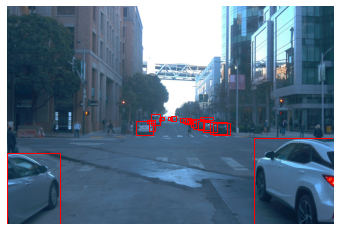

In [152]:
image_data = open('/home/rdr2143/adversarial-yolo/inria/Train/pos/crop001001.png', 'rb').read()
labels_data = open('/home/rdr2143/adversarial-yolo/inria/Train/pos/yolo-labels/crop001001.txt', 'r')

image_data = open('/home/rdr2143/waymo-adv-dataset/train/training_img_0.jpg', 'rb').read()
labels_data = open('/home/rdr2143/waymo-adv-dataset/train/labels/training_img_0.txt', 'r')

labels = []
i = 0 
for each in labels_data.readlines():
    print(each.strip())
    labels.append([float(x) for x in each.strip().split(" ")])
    i += 1

show_camera_image_adhoc(image_data, labels)

In [82]:
0.12606817483901978 * 976

123.0425386428833

[0.0, 0.4838784635066986, 0.41807588934898376, 0.2789943814277649, 0.6265942454338074]
[0.0, 0.7929277420043945, 0.6464556455612183, 0.39821484684944153, 0.7358378171920776]
[0.0, 0.28166693449020386, 0.4169643223285675, 0.14747117459774017, 0.526078462600708]
[0.0, 0.1411471664905548, 0.5185309648513794, 0.2030685991048813, 0.4472614824771881]
[0.0, 0.12606817483901978, 0.3343689739704132, 0.19999463856220245, 0.39520370960235596]


In [122]:
(705-109)

596

In [123]:
        x1, y1, x2, y2 = 261, 109, 511, 705


In [124]:
x2 - x1

250